In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel(r"C:\Users\91834\Downloads\archive (9)\walmart Retail Data.xlsx")
df=data[['Order Date','Sales']]

In [3]:
df.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [4]:
df_prophet = df[['Order Date', 'Sales']].copy()
df_prophet.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [5]:
# Aggregating sales data on a weekly basis
df_weekly = df_prophet.resample('W-MON', on='ds').sum().reset_index()

# Display the aggregated weekly data
df_weekly.head()

,ds,y
0,2012-01-02,12154.7100
1,2012-01-09,184082.3865
2,2012-01-16,104938.8405
3,2012-01-23,117531.9835
4,2012-01-30,78733.4990


In [6]:
split_point = int(len(df_weekly) * 0.8)  # 80% for training

train_data = df_weekly.iloc[:split_point]
test_data = df_weekly.iloc[split_point:]

# Display the range of dates for training and testing sets
train_date_range = (train_data['ds'].min(), train_data['ds'].max())
test_date_range = (test_data['ds'].min(), test_data['ds'].max())

train_date_range, test_date_range

((Timestamp('2012-01-02 00:00:00'), Timestamp('2015-03-16 00:00:00')),
 (Timestamp('2015-03-23 00:00:00'), Timestamp('2016-01-04 00:00:00')))

In [7]:
train_date_range

(Timestamp('2012-01-02 00:00:00'), Timestamp('2015-03-16 00:00:00'))

In [8]:
test_date_range

(Timestamp('2015-03-23 00:00:00'), Timestamp('2016-01-04 00:00:00'))

In [9]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model on the training data
model.fit(train_data)

# Create a DataFrame for future predictions (including the test period)
future = model.make_future_dataframe(periods=12, freq='W-MON')

# Generate forecasts
forecast = model.predict(future)

# Display the forecasted data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


18:41:38 - cmdstanpy - INFO - Chain [1] start processing
18:41:38 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
175,2015-05-11,53422.667129,19827.342147,89015.714651
176,2015-05-18,50931.570066,15356.086081,85648.221738
177,2015-05-25,51926.526199,16057.579078,85365.341086
178,2015-06-01,50672.359262,16984.349229,85563.522433
179,2015-06-08,45397.314778,11054.743597,80435.692187


In [10]:
# test_data

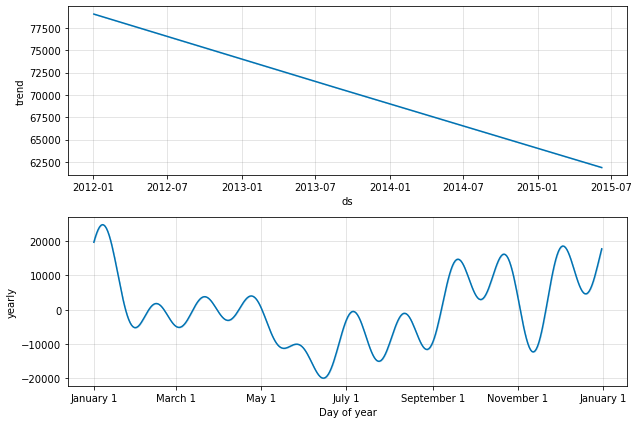

In [11]:
fig = model.plot_components(forecast)
plt.show()


C:\Users\91834\AppData\Local\Temp\ipykernel_16312\3854642000.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


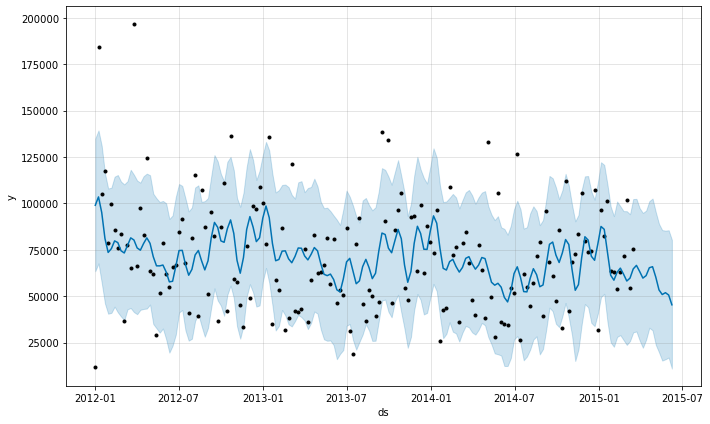

In [12]:
# Plot the forecast
fig = model.plot(forecast)
fig.show()

# Plot the forecast components (trend, seasonality)
# fig_components = model.plot_components(forecast)
# fig_components.show()


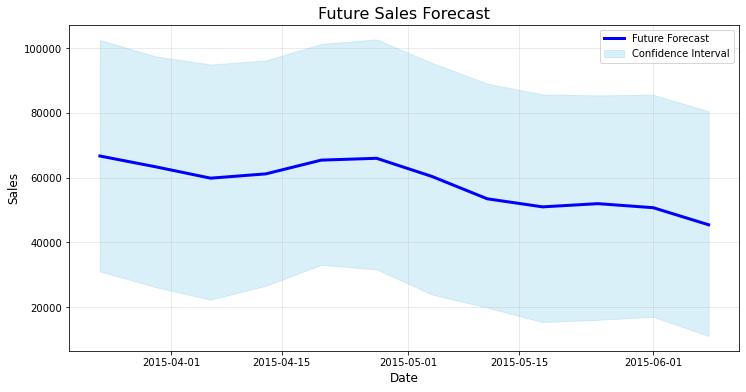

In [13]:
# Filter only future forecasted data
future_forecast = forecast[forecast['ds'] > train_data['ds'].max()]

# Check if future_forecast is empty
if future_forecast.empty:
    print("No future data available for plotting. Please check the filtering logic.")
else:
    # Plot the future forecast
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the forecasted future line
    ax.plot(
        future_forecast['ds'], 
        future_forecast['yhat'], 
        label='Future Forecast', 
        color='blue', 
        linewidth=3, 
        linestyle='-'
    )

    # Highlight confidence intervals for the future forecast
    ax.fill_between(
        future_forecast['ds'], 
        future_forecast['yhat_lower'], 
        future_forecast['yhat_upper'], 
        color='skyblue', 
        alpha=0.3, 
        label='Confidence Interval'
    )

    # Add labels, legend, and grid
    ax.set_title('Future Sales Forecast', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Sales', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

    # Display the plot
    plt.show()


Enter the number of weeks to forecast: 12
            ds          yhat    yhat_lower     yhat_upper
168 2015-03-23  66639.301350  30606.669203  102466.865010
169 2015-03-30  63332.168078  28889.582902  101686.993712
170 2015-04-06  59795.968576  25127.104735   94173.122046
171 2015-04-13  61125.035990  27671.153933   95108.439800
172 2015-04-20  65368.291623  33989.292840   99528.189011
173 2015-04-27  65936.785537  28993.579355  103455.695357
174 2015-05-04  60328.854330  23918.104376   96976.822588
175 2015-05-11  53422.667129  20541.659035   89175.920239
176 2015-05-18  50931.570066  15868.705169   88268.889495
177 2015-05-25  51926.526199  16231.911060   86896.948207
178 2015-06-01  50672.359262  14484.540324   83578.116562
179 2015-06-08  45397.314778   9846.415538   80326.722814


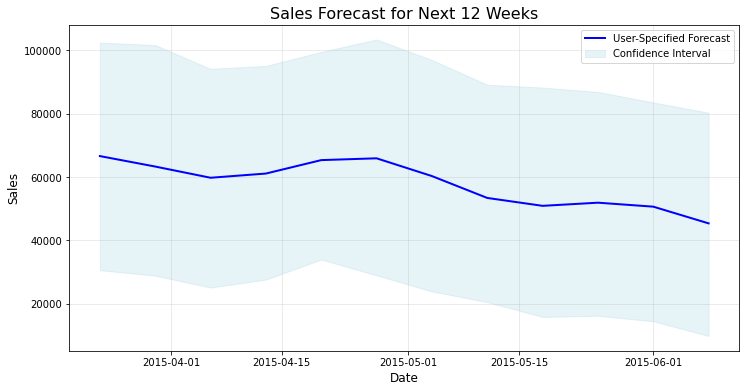

In [14]:
# User input for forecasting
import datetime

# Ask the user for the future date or weeks to forecast
input_weeks = int(input("Enter the number of weeks to forecast: "))

# Generate a future DataFrame based on user input
future = model.make_future_dataframe(periods=input_weeks, freq='W-MON')

# Predict future sales
forecast = model.predict(future)

# Filter forecast data for user-defined range
last_date = train_data['ds'].max()
future_forecast = forecast[forecast['ds'] > last_date]

# Display future forecast
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot the future forecast
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the forecasted line
ax.plot(
    future_forecast['ds'], 
    future_forecast['yhat'], 
    label='User-Specified Forecast', 
    color='blue', 
    linewidth=2
)

# Highlight confidence intervals
ax.fill_between(
    future_forecast['ds'], 
    future_forecast['yhat_lower'], 
    future_forecast['yhat_upper'], 
    color='lightblue', 
    alpha=0.3, 
    label='Confidence Interval'
)

# Add labels, legend, and grid
ax.set_title(f"Sales Forecast for Next {input_weeks} Weeks", fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.show()


In [15]:
from joblib import dump

# Save the trained Prophet model
dump(model, 'prophet_sales_model.joblib')

print("Model saved as 'prophet_sales_model.joblib'")


Model saved as 'prophet_sales_model.joblib'


In [16]:
%%writefile app1.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load
from prophet import Prophet
import plotly.express as px  # Optional if you want to use Plotly



# -- Plotly Interactive Chart --
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from joblib import load
from prophet import Prophet

def main():
    # Set up the page configuration for Streamlit
    st.set_page_config(
        page_title="Advanced Sales Forecasting Dashboard",
        layout="wide",
        initial_sidebar_state="expanded"
    )

    # Page Title
    st.title("Advanced Sales Forecasting Dashboard")

    # Sidebar Configuration
    st.sidebar.title("Forecast Configuration")

    # Load the Prophet model
    with st.spinner("Loading model..."):
        model = load("prophet_sales_model.joblib")
    st.sidebar.success("Model loaded successfully.")

    # Sidebar input for the forecast horizon (weeks)
    input_weeks = st.sidebar.number_input(
        "Forecast horizon (in weeks):",
        min_value=1,
        max_value=104,
        value=4,
        step=1
    )

    # Checkbox to optionally show entire forecast (historical + future)
    show_entire_forecast = st.sidebar.checkbox(
        "Show entire forecast (historical + future)",
        value=False
    )

    # Dropdown (selectbox) to optionally display the table data
    display_table_option = st.sidebar.selectbox(
        "Display Forecast Data Table?",
        options=["No", "Yes"],
        index=0
    )

    # Button to trigger the forecast
    if st.sidebar.button("Generate Forecast"):
        # Create the future dataframe
        future = model.make_future_dataframe(
            periods=input_weeks,
            freq='W-MON'
        )

        # Generate the forecast
        forecast = model.predict(future)

        # Decide how much of the forecast to display
        if show_entire_forecast:
            df_forecast = forecast.copy()
        else:
            # Show only newly forecasted portion
            df_forecast = forecast[
                forecast['ds'] > future['ds'].max() - pd.Timedelta(weeks=input_weeks)
            ]

        # ----------------------------------------
        # Conditionally display the forecast table
        # ----------------------------------------
        if display_table_option == "Yes":
            st.subheader("Forecasted Data")
            st.dataframe(
                df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].style.format({
                    'yhat': '{:.2f}',
                    'yhat_lower': '{:.2f}',
                    'yhat_upper': '{:.2f}'
                })
            )

        # ----------------------------------------
        # Create an interactive Plotly Figure
        # ----------------------------------------
        fig = go.Figure()

        # Add forecast line (yhat)
        fig.add_trace(go.Scatter(
            x=df_forecast['ds'],
            y=df_forecast['yhat'],
            mode='lines',
            name='Forecast',
            line=dict(color='blue', width=2)
        ))

        # Add confidence interval fill
        fig.add_trace(go.Scatter(
            x=pd.concat([df_forecast['ds'], df_forecast['ds'][::-1]]),
            y=pd.concat([df_forecast['yhat_upper'], df_forecast['yhat_lower'][::-1]]),
            fill='toself',
            fillcolor='rgba(135, 206, 250, 0.3)',
            line=dict(color='rgba(255,255,255,0)'),
            hoverinfo="skip",
            showlegend=True,
            name='Confidence Interval'
        ))

        # Update layout (titles, legend, template)
        fig.update_layout(
            title_text=f"Sales Forecast for Next {input_weeks} Week(s)",
            xaxis_title="Date",
            yaxis_title="Sales",
            legend=dict(
                yanchor="top",
                y=0.98,
                xanchor="left",
                x=0.02
            ),
            margin=dict(l=40, r=40, t=60, b=40),
            template='plotly_white'
        )

        # ----------------------------------------
        # Fix the range selector to use days instead of "week"
        # ----------------------------------------
        fig.update_xaxes(
            rangeslider_visible=True,
            rangeselector=dict(
                buttons=list([
                    dict(count=28, label="4w", step="day", stepmode="backward"),   # 4 weeks = 28 days
                    dict(count=84, label="12w", step="day", stepmode="backward"),  # 12 weeks = 84 days
                    dict(count=168, label="24w", step="day", stepmode="backward"), # 24 weeks = 168 days
                    dict(step="all", label="All")
                ])
            )
        )

        # Display the Plotly chart in Streamlit
        st.plotly_chart(fig, use_container_width=True)

    else:
        st.info("Configure your forecast options in the sidebar and click 'Generate Forecast'.")

# Run the app
if __name__ == "__main__":
    main()


Writing app1.py


In [17]:
!streamlit run app1.py & npx localtunnel --port 8501

Traceback (most recent call last):
  File "C:\Users\91834\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\91834\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\91834\AppData\Local\Programs\Python\Python310\Scripts\streamlit.exe\__main__.py", line 4, in <module>
  File "C:\Users\91834\AppData\Local\Programs\Python\Python310\lib\site-packages\streamlit\__init__.py", line 55, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "C:\Users\91834\AppData\Local\Programs\Python\Python310\lib\site-packages\streamlit\delta_generator.py", line 36, in <module>
    from streamlit import config, cursor, env_util, logger, runtime, type_util, util
  File "C:\Users\91834\AppData\Local\Programs\Python\Python310\lib\site-packages\streamlit\cursor.py", line 18, in <module>
    from streaml